In [49]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from cynetdiff.utils import networkx_to_ic_model
import numpy as np
from coloraide import Color

Graph = nx.Graph | nx.DiGraph

In [50]:
def create_plot_for_nodes_infected_perc(
    graphs: Graph | list[Graph],
    plot_iqr: bool = False,
):
    # TODO Dhemath, see if there's a way to fix the bar running out on the shorter experiments.
    """
    Create a plot of the percentage of nodes infected for a CyNetDiff model across multiple trials for up to four graphs.
    If plot_iqr is True, plots the interquartile range and horizontal lines.
    """

    if not isinstance(graphs, list):
        graphs = [graphs]

    colors = [Color.random("srgb") for _ in range(len(graphs))]
    # "#3f83a6",
    # "#d95f02",
    # "#1b9e77",
    # "#7570b3",
    # ]  # Distinct colors for each graph
    # TODO assign lighter color using the library.
    light_colors = [
        "#7daec7",
        "#fdae6b",
        "#66c2a5",
        "#bcbddc",
    ]  # Lighter colors for IQR fill

    for idx, graph in enumerate(graphs):
        model = networkx_to_ic_model(graph)

        seeds = set(random.sample(list(graph.nodes()), 100))
        model.set_seeds(seeds)
        num_trials = 100

        all_trials_infected_nodes = []
        max_length = 0

        for _ in range(num_trials):
            model.reset_model()

            infected_nodes_over_time = []
            previous_activated = -1
            current_activated = 0

            while previous_activated != current_activated:
                previous_activated = current_activated
                model.advance_model()
                current_activated = model.get_num_activated_nodes()
                number_infected = current_activated
                # (
                #    current_activated / graph.number_of_nodes()
                # ) * 100
                infected_nodes_over_time.append(number_infected)

            max_length = max(max_length, len(infected_nodes_over_time))
            all_trials_infected_nodes.append(infected_nodes_over_time)

        padded_trials = [
            trial + [trial[-1]] * (max_length - len(trial))
            for trial in all_trials_infected_nodes
        ]

        median_infected = np.median(padded_trials, axis=0)

        if plot_iqr:
            iqr_values = [
                np.percentile(
                    [
                        trial[i] if i < len(trial) else trial[-1]
                        for trial in padded_trials
                    ],
                    [25, 75],
                )
                for i in range(max_length)
            ]
            lower_quartile, upper_quartile = zip(*iqr_values)

            for y in median_infected:
                plt.axhline(y=y, color=colors[idx], linestyle="--", alpha=0.2)

            plt.fill_between(
                range(len(lower_quartile)),
                lower_quartile,
                upper_quartile,
                color=light_colors[idx],
                alpha=0.3,
            )

        plt.plot(
            median_infected, label=f"Graph {idx+1} Median Infected", color=colors[idx]
        )

    plt.xlabel("Iteration")
    plt.ylabel("Number of Infected Nodes")
    plt.title("Diffusion Process Over Time")
    plt.legend()
    plt.show()

In [51]:
def create_plot_for_delta_nodes_infected(
    graph1: nx.Graph,
    graph2: nx.Graph = None,
    graph3: nx.Graph = None,
    graph4: nx.Graph = None,
    plot_iqr: bool = False,
):
    """
    Create a plot of the delta of nodes infected for a CyNetDiff model across multiple trials for up to four graphs.
    If plot_iqr is True, plots the interquartile range and horizontal lines.
    """
    graphs = [g for g in [graph1, graph2, graph3, graph4] if g is not None]
    for graph in graphs:
        model = networkx_to_ic_model(graph)
        # Assuming set_seeds is defined elsewhere or seeds need to be defined/adjusted per graph
        seeds = set(random.sample(list(graph.nodes()), 100))
        model.set_seeds(seeds)
        num_trials = 1

        all_trials_delta_nodes = []
        max_length = 0

        for _ in range(num_trials):
            model.reset_model()

            delta_nodes_over_time = []
            previous_activated = -1
            current_activated = 0

            while previous_activated != current_activated:
                previous_activated = current_activated
                model.advance_model()
                current_activated = model.get_num_activated_nodes()
                delta_nodes_over_time.append(current_activated - previous_activated)

            max_length = max(max_length, len(delta_nodes_over_time))
            all_trials_delta_nodes.append(delta_nodes_over_time)

        padded_trials = [
            trial + [0] * (max_length - len(trial)) for trial in all_trials_delta_nodes
        ]

        median_delta = np.median(padded_trials, axis=0)

        if plot_iqr:
            # Calculate and plot the IQR only if plot_iqr is True
            iqr_values = [
                np.percentile(
                    [trial[i] if i < len(trial) else 0 for trial in padded_trials],
                    [25, 75],
                )
                for i in range(max_length)
            ]
            lower_quartile, upper_quartile = zip(*iqr_values)

            for y in median_delta:
                plt.axhline(y=y, color="gray", linestyle="--", alpha=0.2)

            plt.fill_between(
                range(len(lower_quartile)),
                lower_quartile,
                upper_quartile,
                color="#7daec7",
                alpha=0.3,
            )

        plt.plot(median_delta, label="Median Delta Nodes", color="#3f83a6")

    plt.xlabel("Iteration")
    plt.ylabel("Delta Nodes Infected")
    plt.title("Diffusion Process Over Time")
    plt.legend()
    plt.show()

In [55]:
# O = nx.fast_gnp_random_graph(15000, 2)
graphs = []

base_graph = nx.watts_strogatz_graph(15_000, 10, 0.01)

for weight_fn in ()

graphs
# [
#    nx.watts_strogatz_graph(15_000, 10, 0.01),
#    nx.watts_strogatz_graph(15_000, 10, 0.02),
#    nx.watts_strogatz_graph(15_000, 10, 0.05),
#    nx.watts_strogatz_graph(15_000, 10, 0.10),
#    nx.watts_strogatz_graph(15_000, 10, 0.20),

# nx.watts_strogatz_graph(15_000, 11, 0.01),
# nx.watts_strogatz_graph(15_000, 12, 0.01),
# nx.watts_strogatz_graph(15_000, 10, 0.02),
# nx.watts_strogatz_graph(15_000, 11, 0.02),
# nx.watts_strogatz_graph(15_000, 12, 0.02),
# ]
# B = nx.erdos_renyi_graph(100, 0.1)
# nx.set_edge_attributes(G, 0.01, "activation_prob")
# nx.set_edge_attributes(O, 0.01, "activation_prob")
# nx.set_edge_attributes(B, 0.01, "activation_prob")

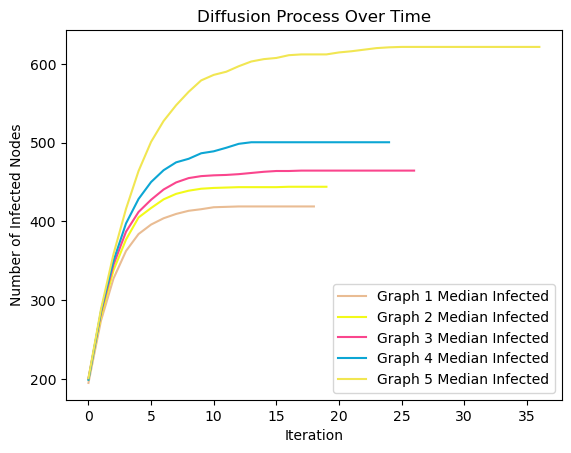

In [56]:
create_plot_for_nodes_infected_perc(graphs)

In [ ]:
def compute_marginal_gain(model, new_node, seeds) -> float:


In [54]:
# Cell with CELF algorithm.
# Code adapted from https://hautahi.com/im_greedycelf


def celf(g: Graph, k: int, mc: int = 1000) -> set[int]:
    """
    Input:  graph object, number of seed nodes
    Output: optimal seed set, resulting spread, time for each iteration
    """

    # --------------------
    # Find the first node with greedy algorithm
    # --------------------

    # Calculate the first iteration sorted list
    marg_gain = [IC(g, [node], p, mc) for node in range(g.vcount())]

    # Create the sorted list of nodes and their marginal gain
    Q = sorted(zip(range(g.vcount()), marg_gain), key=lambda x: x[1], reverse=True)

    # Select the first node and remove from candidate list
    S, spread, SPREAD = [Q[0][0]], Q[0][1], [Q[0][1]]
    Q, LOOKUPS = Q[1:], [g.vcount()]

    # --------------------
    # Find the next k-1 nodes using the list-sorting procedure
    # --------------------

    for _ in range(k - 1):
        check, node_lookup = False, 0

        while not check:
            # Count the number of times the spread is computed
            node_lookup += 1

            # Recalculate spread of top node
            current = Q[0][0]

            # Evaluate the spread function and store the marginal gain in the list
            Q[0] = (current, IC(g, S + [current], p, mc) - spread)

            # Re-sort the list
            Q = sorted(Q, key=lambda x: x[1], reverse=True)

            # Check if previous top node stayed on top after the sort
            check = Q[0][0] == current

        # Select the next node
        spread += Q[0][1]
        S.append(Q[0][0])
        SPREAD.append(spread)
        LOOKUPS.append(node_lookup)

        # Remove the selected node from the list
        Q = Q[1:]

    return (S, SPREAD, LOOKUPS)